In [1]:
## Back testing investment strategies

In [2]:
import pandas as pd

In [3]:
pd.read_csv('dji.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3796 non-null   object 
 1   Open       3796 non-null   float64
 2   High       3796 non-null   float64
 3   Low        3796 non-null   float64
 4   Close      3796 non-null   float64
 5   Adj Close  3796 non-null   float64
 6   Volume     3796 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 207.7+ KB


In [4]:
data = pd.read_csv('dji.csv', parse_dates = ['Date'], index_col = 'Date') #Here we are turning the strings into datetime object as well as using dates as the index (this is stardard in finance) 

In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2022-01-24,34070.609375,34420.988281,33150.328125,34364.500000,34364.500000,664010000
2022-01-25,34186.640625,34591.039062,33545.519531,34297.730469,34297.730469,506430000
2022-01-26,34520.820312,34815.671875,33876.480469,34168.089844,34168.089844,546330000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3796 entries, 2007-01-03 to 2022-01-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3796 non-null   float64
 1   High       3796 non-null   float64
 2   Low        3796 non-null   float64
 3   Close      3796 non-null   float64
 4   Adj Close  3796 non-null   float64
 5   Volume     3796 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 207.6 KB


In [7]:
df = data.loc['2010-01-01': '2022-01-31','Close'].to_frame() #wanted to capture economy after market crash of '08 and also capture economic effects of Covid'

In [8]:
df

,Close
Date,
2010-01-04,10583.959961
2010-01-05,10572.019531
2010-01-06,10573.679688
2010-01-07,10606.860352
2010-01-08,10618.190430
...,...
2022-01-24,34364.500000
2022-01-25,34297.730469
2022-01-26,34168.089844


In [9]:
#data visualizations & Returns

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')

In [11]:
df.describe()

,Close
count,3040.000000
mean,19854.548111
std,7016.034840
min,9686.480469
25%,13579.092285
50%,17877.485352
75%,25402.820312
max,36799.648438


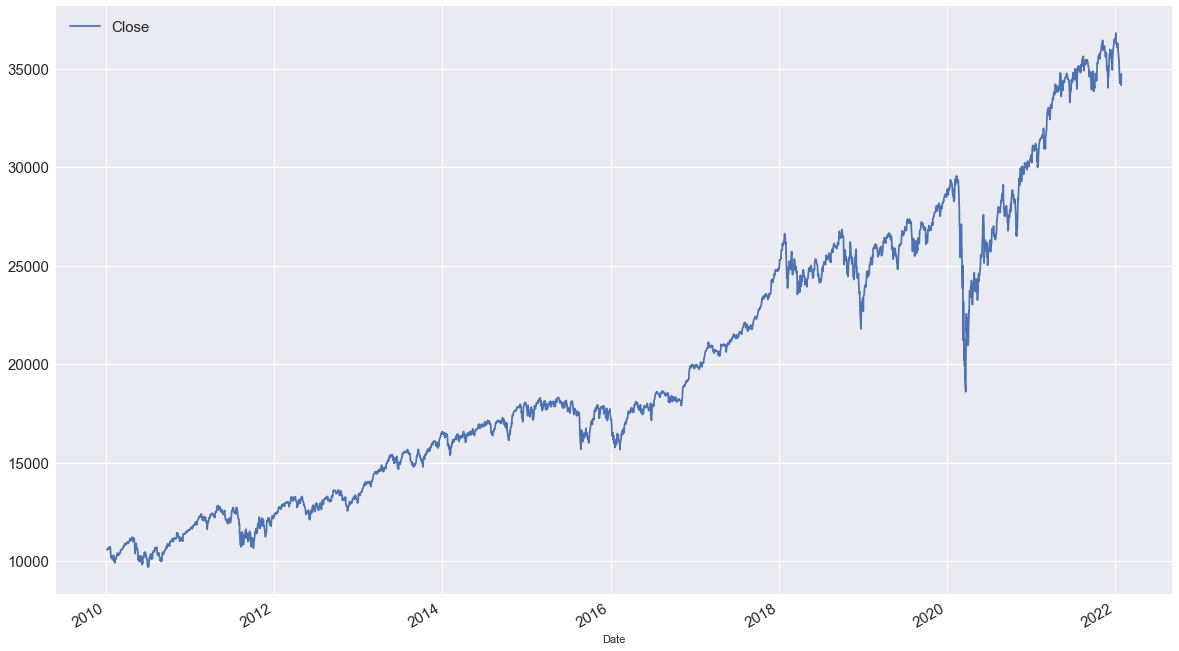

In [12]:
df.plot(figsize = (20,12),fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [13]:
df['Return'] = df.pct_change()

In [14]:
df

,Close,Return
Date,,
2010-01-04,10583.959961,NaN
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
...,...,...
2022-01-24,34364.500000,0.002893
2022-01-25,34297.730469,-0.001943
2022-01-26,34168.089844,-0.003780


In [15]:
df.dropna(inplace = True) #drop rows with missing returns

In [16]:
df

,Close,Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2022-01-24,34364.500000,0.002893
2022-01-25,34297.730469,-0.001943
2022-01-26,34168.089844,-0.003780


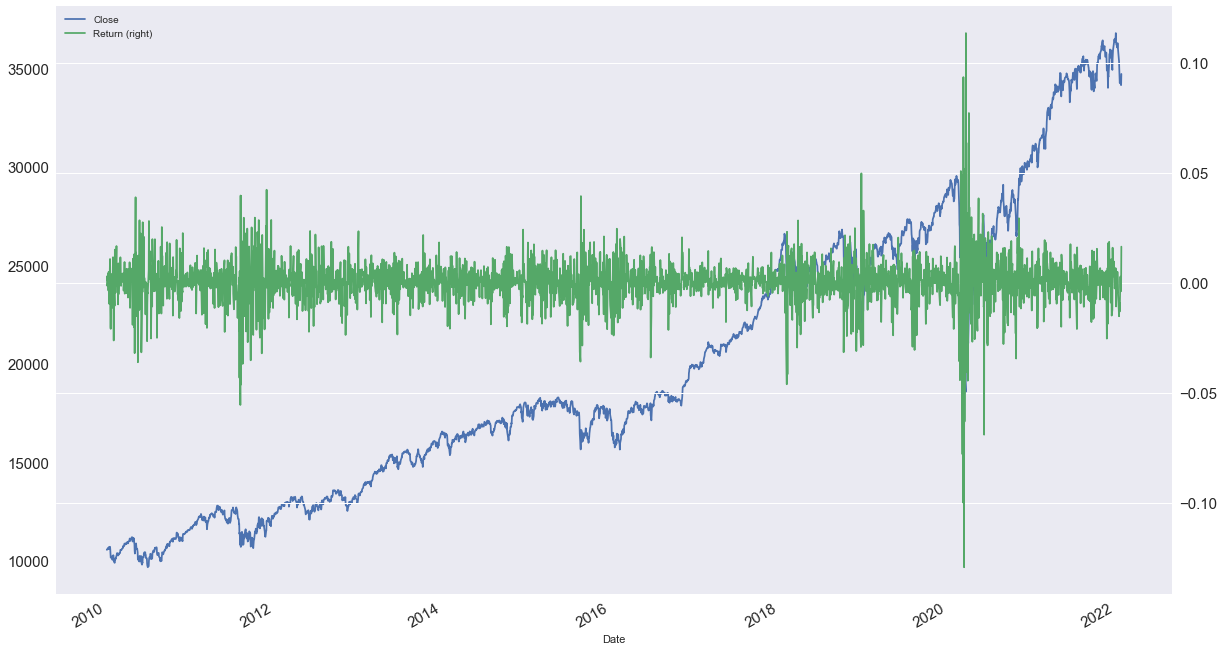

In [17]:
df.plot(figsize = (20,12), secondary_y = 'Return', mark_right = True, fontsize = 15)
plt.show()
#daily close prices and returns oscilating around zero

In [18]:
df.rename(columns = {'Close':'DJI_Close', 'Return':'DJI_Return'}, inplace = True)

In [19]:
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2022-01-24,34364.500000,0.002893
2022-01-25,34297.730469,-0.001943
2022-01-26,34168.089844,-0.003780


In [20]:
#Backtesting a Momentum Strategy

In [21]:
#postions:
#+1: Investing in DJI (Long)
#-1: Investing in DJI (short)
#0: No position (nuetral)

#Strategies:
#- Buy and Hold (passive investing by just putting money into DJI and doing nothing)
# - Momentum (Active Strategy)
# a) investing(+1) into DJI tomorrow if today was positive
# b) Shorting (-1) into DJI tomorrow if today was negative

In [22]:
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2022-01-24,34364.500000,0.002893
2022-01-25,34297.730469,-0.001943
2022-01-26,34168.089844,-0.003780


In [23]:
df['Position'] = np.sign(df['DJI_Return']) #sign shows if you have a negative or postive

In [24]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0
...,...,...,...
2022-01-24,34364.500000,0.002893,1.0
2022-01-25,34297.730469,-0.001943,-1.0
2022-01-26,34168.089844,-0.003780,-1.0


In [25]:
df['Strategy_Ret'] = df['Position'].shift() * df['DJI_Return']

In [26]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN
2010-01-06,10573.679688,0.000157,1.0,-0.000157
2010-01-07,10606.860352,0.003138,1.0,0.003138
2010-01-08,10618.190430,0.001068,1.0,0.001068
2010-01-11,10663.990234,0.004313,1.0,0.004313
...,...,...,...,...
2022-01-24,34364.500000,0.002893,1.0,-0.002893
2022-01-25,34297.730469,-0.001943,-1.0,-0.001943
2022-01-26,34168.089844,-0.003780,-1.0,0.003780


In [27]:
df.Strategy_Ret.add(1, fill_value = 0).cumprod()

Date
2010-01-05    1.000000
2010-01-06    0.999843
2010-01-07    1.002981
2010-01-08    1.004052
2010-01-11    1.008383
                ...   
2022-01-24    0.478816
2022-01-25    0.477886
2022-01-26    0.479692
2022-01-27    0.479794
2022-01-28    0.471863
Name: Strategy_Ret, Length: 3039, dtype: float64

In [28]:
df['Strategy'] = df.Strategy_Ret.add(1, fill_value = 0).cumprod()* df.iloc[0,0]

In [29]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
...,...,...,...,...,...
2022-01-24,34364.500000,0.002893,1.0,-0.002893,5062.050587
2022-01-25,34297.730469,-0.001943,-1.0,-0.001943,5052.215125
2022-01-26,34168.089844,-0.003780,-1.0,0.003780,5071.311792


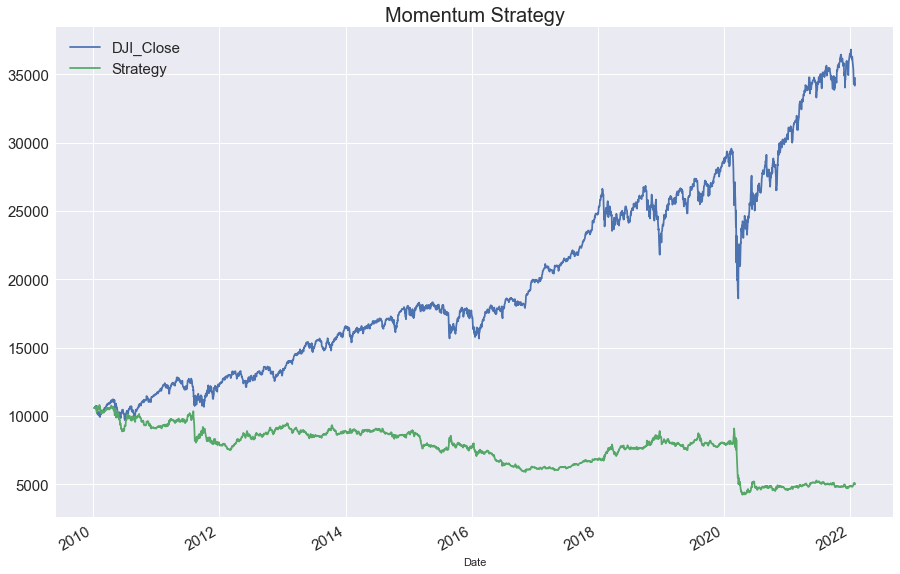

In [30]:
df[['DJI_Close','Strategy']].plot(figsize = (15,10),fontsize = 15)
plt.title('Momentum Strategy',fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [31]:
def summary_ann(returns):
    summary = returns.agg(['mean','std']).T
    summary['Return'] = summary['mean']*252
    summary['Risk'] = summary['std']*np.sqrt(252)
    summary.drop(columns = ['mean','std'],inplace = True)
    return summary

In [32]:
summary_ann(df[['DJI_Return','Strategy_Ret']]) #not a benefitical strategy for momentum following

,Return,Risk
DJI_Return,0.113080,0.170120
Strategy_Ret,-0.047677,0.170243


In [33]:
#Backtesting a Contrarian Strategy

In [34]:
#Strategies:
#- Buy and Hold (passive investing by just putting money into DJI and doing nothing, +1 on all days)
# - Contrarian (Active Strategy)
# a) investing(+1) into DJI tomorrow if today was negative
# b) Shorting (-1) into DJI tomorrow if today was positive

In [35]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2022-01-24,34070.609375,34420.988281,33150.328125,34364.500000,34364.500000,664010000
2022-01-25,34186.640625,34591.039062,33545.519531,34297.730469,34297.730469,506430000
2022-01-26,34520.820312,34815.671875,33876.480469,34168.089844,34168.089844,546330000


In [36]:
df = data.loc['2010':,'Close'].to_frame()
df['DJI_Return'] = df.Close.pct_change()
df.columns = ['DJI_Close','DJI_Return']
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2022-01-24,34364.500000,0.002893
2022-01-25,34297.730469,-0.001943
2022-01-26,34168.089844,-0.003780


In [37]:
df['Position'] = -np.sign(df['DJI_Return'])

In [38]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,1.0
2010-01-06,10573.679688,0.000157,-1.0
2010-01-07,10606.860352,0.003138,-1.0
2010-01-08,10618.190430,0.001068,-1.0
2010-01-11,10663.990234,0.004313,-1.0
...,...,...,...
2022-01-24,34364.500000,0.002893,-1.0
2022-01-25,34297.730469,-0.001943,1.0
2022-01-26,34168.089844,-0.003780,1.0


In [39]:
df['Strategy_Ret'] = df['Position'].shift() * df['DJI_Return']

In [40]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN
2010-01-06,10573.679688,0.000157,-1.0,0.000157
2010-01-07,10606.860352,0.003138,-1.0,-0.003138
2010-01-08,10618.190430,0.001068,-1.0,-0.001068
2010-01-11,10663.990234,0.004313,-1.0,-0.004313
...,...,...,...,...
2022-01-24,34364.500000,0.002893,-1.0,0.002893
2022-01-25,34297.730469,-0.001943,1.0,0.001943
2022-01-26,34168.089844,-0.003780,1.0,-0.003780


In [41]:
df['Strategy'] = df.Strategy_Ret.add(1,fill_value = 0).cumprod()* df.iloc[0,0]

In [42]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,-1.0,0.000157,10573.679688
2010-01-07,10606.860352,0.003138,-1.0,-0.003138,10540.499023
2010-01-08,10618.190430,0.001068,-1.0,-0.001068,10529.239831
2010-01-11,10663.990234,0.004313,-1.0,-0.004313,10483.823700
...,...,...,...,...,...
2022-01-24,34364.500000,0.002893,-1.0,0.002893,15565.782554
2022-01-25,34297.730469,-0.001943,1.0,0.001943,15596.026556
2022-01-26,34168.089844,-0.003780,1.0,-0.003780,15537.075756


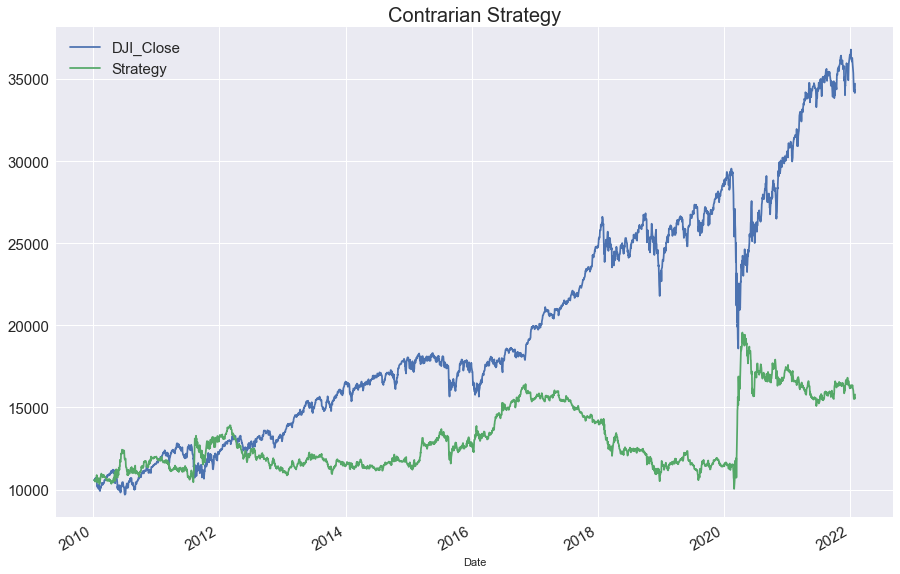

In [43]:
df[['DJI_Close','Strategy']].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title('Contrarian Strategy', fontsize = 20)
plt.show()

In [44]:
summary_ann(df[['DJI_Return','Strategy_Ret']])

,Return,Risk
DJI_Return,0.113080,0.170120
Strategy_Ret,0.047677,0.170243


In [46]:
#Strategy Based on Simple Moving Averages

In [47]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2022-01-24,34070.609375,34420.988281,33150.328125,34364.500000,34364.500000,664010000
2022-01-25,34186.640625,34591.039062,33545.519531,34297.730469,34297.730469,506430000
2022-01-26,34520.820312,34815.671875,33876.480469,34168.089844,34168.089844,546330000


In [51]:
df = data.loc['2010':, 'Close'].to_frame()
df['DJI_Return'] = df.Close.pct_change()
df.columns = ['DJI_Close','DJI_Return']
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2022-01-24,34364.500000,0.002893
2022-01-25,34297.730469,-0.001943
2022-01-26,34168.089844,-0.003780


In [52]:
#let's define a rolling window for an average streak
df.DJI_Close.rolling(window = 50).mean()

Date
2010-01-05             NaN
2010-01-06             NaN
2010-01-07             NaN
2010-01-08             NaN
2010-01-11             NaN
                  ...     
2022-01-24    35683.198516
2022-01-25    35650.728516
2022-01-26    35612.084141
2022-01-27    35573.550781
2022-01-28    35545.215781
Name: DJI_Close, Length: 3039, dtype: float64

In [53]:
df['SMA50'] = df.DJI_Close.rolling(window = 50).mean()

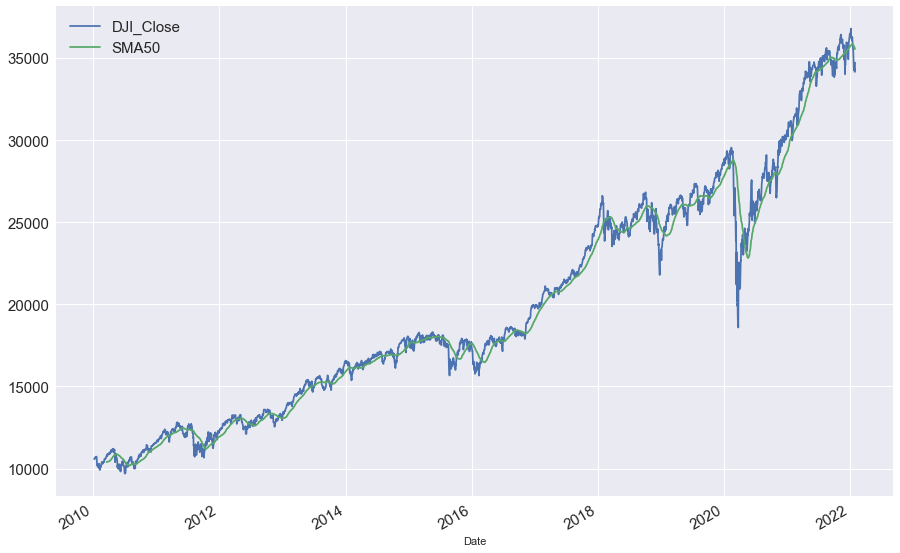

In [54]:
df[['DJI_Close', 'SMA50']].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [55]:
df['SMA200'] = df.DJI_Close.rolling(window = 200).mean()

In [56]:
df

,DJI_Close,DJI_Return,SMA50,SMA200
Date,,,,
2010-01-05,10572.019531,-0.001128,NaN,NaN
2010-01-06,10573.679688,0.000157,NaN,NaN
2010-01-07,10606.860352,0.003138,NaN,NaN
2010-01-08,10618.190430,0.001068,NaN,NaN
2010-01-11,10663.990234,0.004313,NaN,NaN
...,...,...,...,...
2022-01-24,34364.500000,0.002893,35683.198516,34965.626055
2022-01-25,34297.730469,-0.001943,35650.728516,34968.387715
2022-01-26,34168.089844,-0.003780,35612.084141,34970.841816


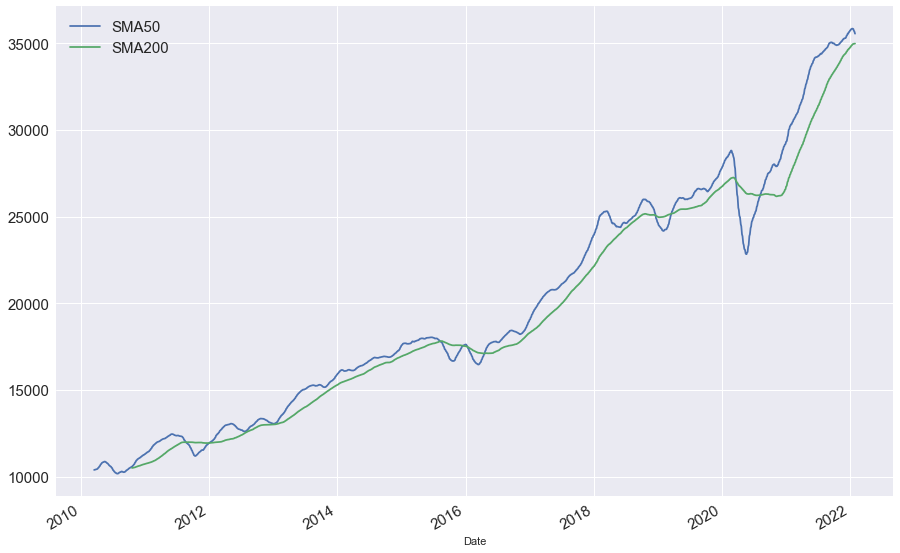

In [58]:
df[['SMA50','SMA200']].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [59]:
df.dropna(inplace = True)

In [60]:
df

,DJI_Close,DJI_Return,SMA50,SMA200
Date,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200
...,...,...,...,...
2022-01-24,34364.500000,0.002893,35683.198516,34965.626055
2022-01-25,34297.730469,-0.001943,35650.728516,34968.387715
2022-01-26,34168.089844,-0.003780,35612.084141,34970.841816


In [61]:
#Comparing Buy and Hold vs.

# SMA Crossover (momentum) 
# a) investing (+1): SMA50 > SMA200
# b) short selling (-1): SMA50 < SMA200

In [63]:
df['Position'] = np.sign(df.SMA50.sub(df.SMA200))

In [64]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position
Date,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0
...,...,...,...,...,...
2022-01-24,34364.500000,0.002893,35683.198516,34965.626055,1.0
2022-01-25,34297.730469,-0.001943,35650.728516,34968.387715,1.0
2022-01-26,34168.089844,-0.003780,35612.084141,34970.841816,1.0


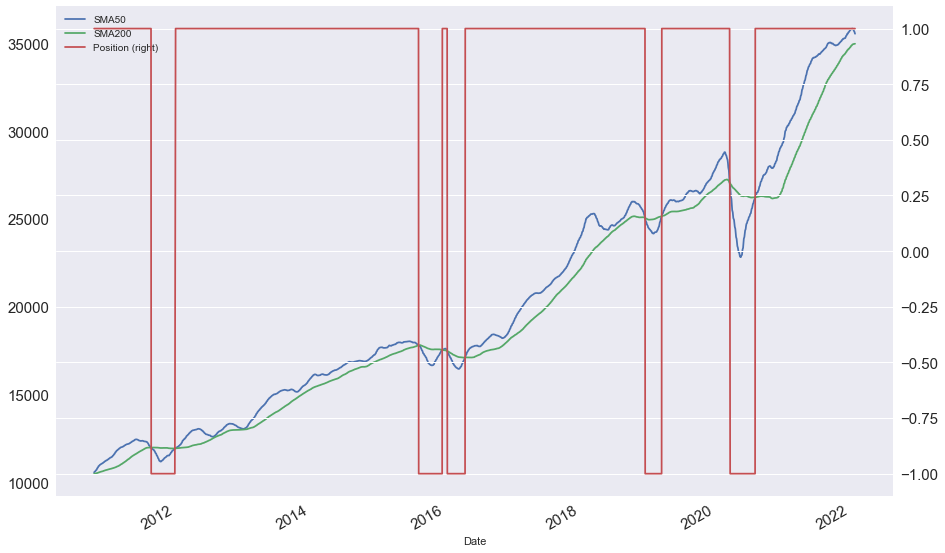

In [67]:
df[['SMA50','SMA200','Position']].plot(figsize = (15,10), secondary_y = 'Position', fontsize = 15)
plt.show()

In [68]:
df['Strategy_Ret'] = df['Position'].shift() * df['DJI_Return']

In [69]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret
Date,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0,NaN
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0,0.011782
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0,0.003475
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0,-0.001257
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0,0.002829
...,...,...,...,...,...,...
2022-01-24,34364.500000,0.002893,35683.198516,34965.626055,1.0,0.002893
2022-01-25,34297.730469,-0.001943,35650.728516,34968.387715,1.0,-0.001943
2022-01-26,34168.089844,-0.003780,35612.084141,34970.841816,1.0,-0.003780


In [70]:
df['Strategy'] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0,0]

In [71]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0,0.011782,11107.969727
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0,0.003475,11146.570312
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0,-0.001257,11132.559570
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0,0.002829,11164.049805
...,...,...,...,...,...,...,...
2022-01-24,34364.500000,0.002893,35683.198516,34965.626055,1.0,0.002893,7654.783768
2022-01-25,34297.730469,-0.001943,35650.728516,34968.387715,1.0,-0.001943,7639.910677
2022-01-26,34168.089844,-0.003780,35612.084141,34970.841816,1.0,-0.003780,7611.032883


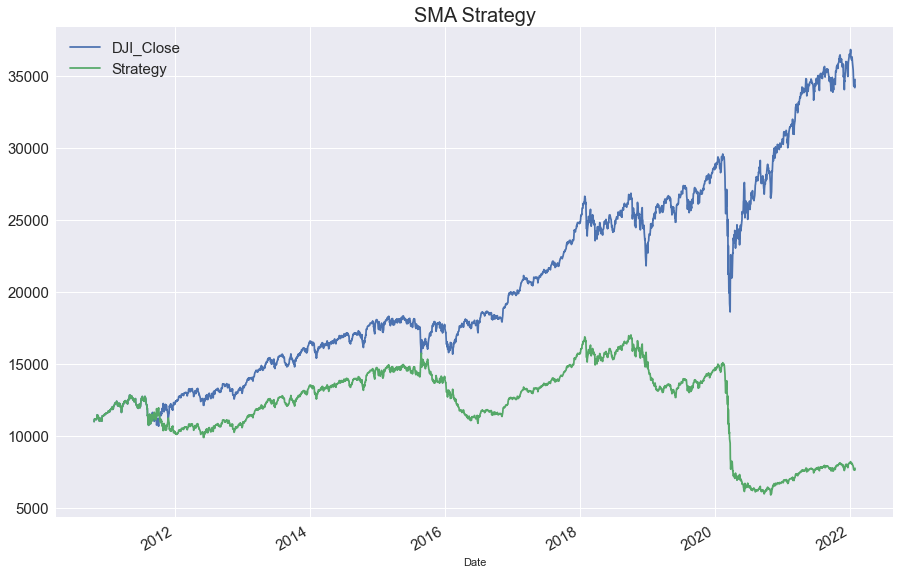

In [72]:
df[['DJI_Close','Strategy']].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title('SMA Strategy', fontsize = 20)
plt.show()

In [73]:
summary_ann(df[['DJI_Return','Strategy_Ret']])

,Return,Risk
DJI_Return,0.115401,0.170032
Strategy_Ret,-0.016414,0.170157
